# ECE 657A : Data and Knowledge Modeling and Analysis

## Assignment 1 : Basic Environment Set-up and Classification

## Iris dataset

#### Libraries Used:
- numpy
- pandas
- seaborn
- matplotlib
- scipy
- scikit-learn

# [CM1]

# Question 1: Data Exploration

### Importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Iris dataset

This dataset includes different features (attributes) of three Iris flower species (setosa, versicolor, virginica).
The features are 'Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width'.

In [2]:
# load dataset
df_iris= pd.read_csv('iris_dataset_missing.csv')

### Displaying and exploring the Iris DataFrame created:

In [3]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [4]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Visualizing the data distribution by generating "pair plots" (using pairplot method of the seaborn library)

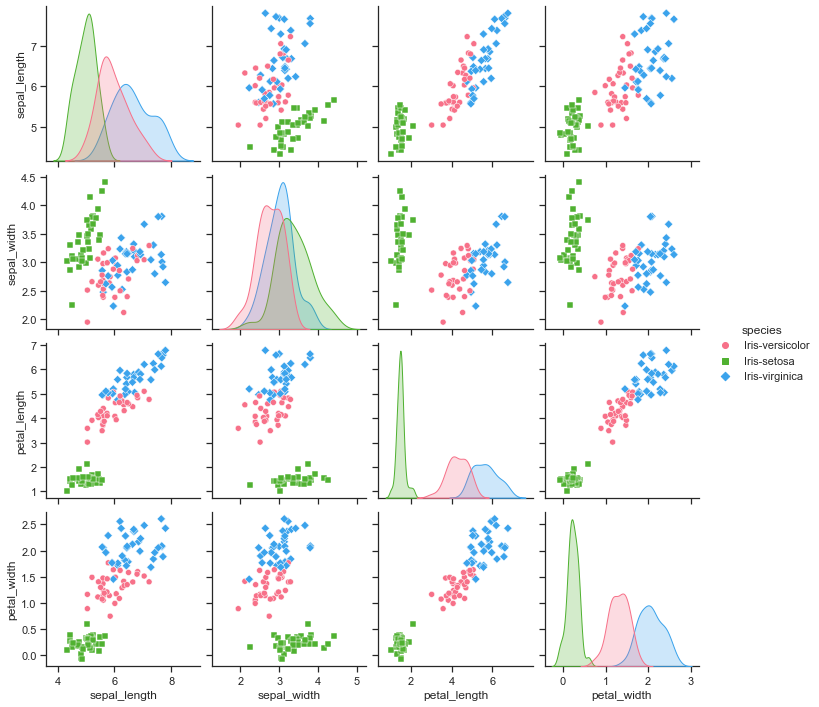

In [6]:
# pairplot
sns.set(style='ticks', color_codes=True)
sns.pairplot(df_iris, hue='species', palette='husl', markers=['o', 's', 'D'])

### From the "pair plot" visualization, we observe that :

- petal length and petal width are most positively correlated as we see a linear increase between the feaures. The scatter plot aligns with a linear line function.

- we observe a similar pattern with petal length and sepal length where there is linear positive correlation. 

- In all the plots, Iris-setosa is easily distinguishable and can be identified irrespective of petal or sepal features. By using petal length, we can distinctly seperate Iris-setosa.

- For Iris-versicolor and Iris-virginica, we see that the plots are mostly overlapping, but petal features provide better distinction than sepal features.

# [CM2]

### Correlation coefficient of each pair of features

Heat map is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation

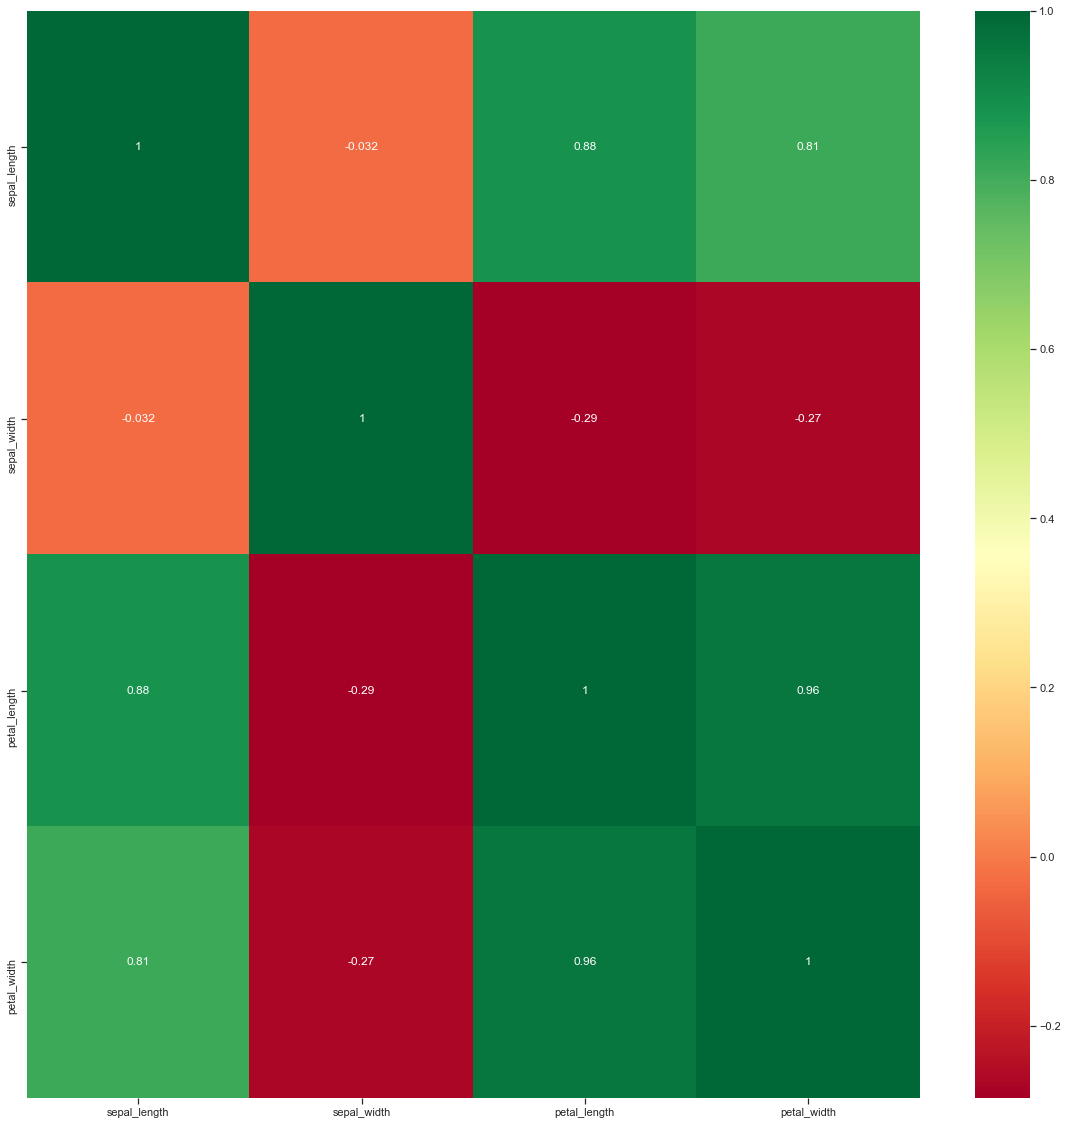

In [7]:
# Get correlations of each features in dataset
corrmat = df_iris.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
iris_heat_map=sns.heatmap(df_iris[top_corr_features].corr(),annot=True,cmap='RdYlGn')


### From the "heat map" visualization, we observe that:

- there is high positive correlation between petal width and petal length i.e increase in petal width corresponds to increase in petal length, and vice versa.

- there is high positive correlation between petal length and sepal length i.e increase in petal length corresponds to increase in petal length, and vice versa.

- there is high positive correlation between petal width and sepal length i.e increase in petal width corresponds to increase in sepal length, and vice versa.

- we see minor negative correlation between petal length, petal width and sepal width.

Mostly we see correlations between the features petal width, petal length and sepal length.As observed in "Pair Plots" we can see petal features are more correlated than sepal features.

### Calculation of  mean, variance, skew, kurtosis for the datasets

In [8]:
# calculate skew
df_iris.skew()

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64

In [9]:
# calculate kurtosis
df_iris.kurtosis()

sepal_length   -0.544820
sepal_width     0.510490
petal_length   -1.389810
petal_width    -1.315451
dtype: float64

In [10]:
# calculate mean
df_iris.mean()

sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64

In [11]:
# calculate variance
df_iris.var()

sepal_length    0.742420
sepal_width     0.207131
petal_length    3.216602
petal_width     0.619672
dtype: float64

### From mean, variance, skew, kurtosis of the dataset, we observe that:

- the data is fairly symmetric as the skewness ranges within [-0.5,0.5]
    
- the kurtosis values for sepal length, petal length and petal width are negative indicating light tail distribution. Whereas, sepal width has positive kurtosis value indicating heavy tail distribution.
    
- variance for petal length is high indicating that the values are highly spread out from the mean.
    
- mean is higher for sepal features than petal features,indicating flower sepals are broader and lengthier than the petals.
   

# [CM3]

### Checking for notable outliers using "Box Plots"

Through box plots, we find the minimum, lower quartile (25th percentile), median (50th percentile), upper quartile (75th percentile), and a maximum of an continuos variable.

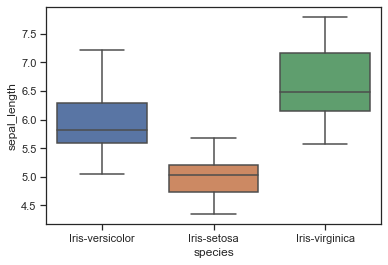

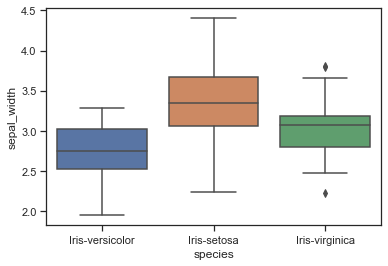

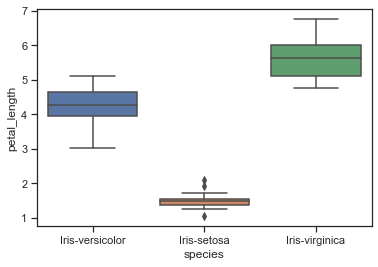

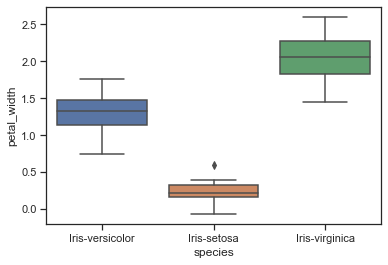

In [12]:
for column in df_iris.columns[:-1]:
    plt.figure()
    ax = sns.boxplot(x='species', y=column, data=df_iris)
    plt.show()

### From the "Box Plot" visualization. We observe that:

- there are couple of outliers in sepal width of Iris-virginica. 
- there are few outliers in petal length of Iris-setosa.
- there is one outlier in petal width of Iris-setosa.

### Checking for outliers using IQR

In [13]:
# finding outliers using Inter Quartile Range (IQR)
for column in df_iris.columns[0:-1]:
    for specie in df_iris['species'].unique():    
        q25 = df_iris[column][df_iris['species'] == specie].quantile(0.25)
        q75 = df_iris[column][df_iris['species'] == specie].quantile(0.75)
        iqr = q75 - q25
        print(specie.upper(), '-', column.upper())
        print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
        
        # Calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # Identify outliers
        df_iris2 = pd.DataFrame(df_iris[df_iris['species'] == specie][column])

        count = len(df_iris2[df_iris2[column] < lower].index)
        count += len(df_iris2[df_iris2[column] > upper].index)
        print('Identified outliers: ', count)

        # replacing outliers with NaN (Will be later replaced with feature mean)
        for index in df_iris2[df_iris2[column] < lower].index:
            df_iris.loc[index, column] = np.nan
        for index in df_iris2[df_iris2[column] > upper].index:
            df_iris.loc[index, column] = np.nan

IRIS-VERSICOLOR - SEPAL_LENGTH
Percentiles: 25th = 5.594, 75th = 6.296, IQR = 0.701
Identified outliers:  0
IRIS-SETOSA - SEPAL_LENGTH
Percentiles: 25th = 4.742, 75th = 5.213, IQR = 0.471
Identified outliers:  0
IRIS-VIRGINICA - SEPAL_LENGTH
Percentiles: 25th = 6.156, 75th = 7.166, IQR = 1.010
Identified outliers:  0
IRIS-VERSICOLOR - SEPAL_WIDTH
Percentiles: 25th = 2.527, 75th = 3.025, IQR = 0.498
Identified outliers:  0
IRIS-SETOSA - SEPAL_WIDTH
Percentiles: 25th = 3.059, 75th = 3.668, IQR = 0.608
Identified outliers:  0
IRIS-VIRGINICA - SEPAL_WIDTH
Percentiles: 25th = 2.803, 75th = 3.182, IQR = 0.379
Identified outliers:  3
IRIS-VERSICOLOR - PETAL_LENGTH
Percentiles: 25th = 3.934, 75th = 4.640, IQR = 0.706
Identified outliers:  0
IRIS-SETOSA - PETAL_LENGTH
Percentiles: 25th = 1.364, 75th = 1.542, IQR = 0.179
Identified outliers:  3
IRIS-VIRGINICA - PETAL_LENGTH
Percentiles: 25th = 5.094, 75th = 6.010, IQR = 0.917
Identified outliers:  0
IRIS-VERSICOLOR - PETAL_WIDTH
Percentiles: 25t

As observed in the "Box Plot", we can see outliers in sepal width, petal length and petal width. The outliers are handled by replacing with feature mean.

# [CM5]

### Data Cleaning

### Checking for null / NaN values (missing data)

In [14]:
# checking for any null / NaN values
df_iris.isnull().values.any()

True

In [15]:
# checking for any null / NaN values
df_iris.isna().sum()

sepal_length     0
sepal_width      7
petal_length    11
petal_width      1
species          0
dtype: int64

We notice few null /  NaN values in the dataset. We can handle these by replacing with feature mean

### Checking for negative values

We notice few negative values in the petal width feature of the dataset (from initial data exploration) . Ideally length and width are expected to be positive. Hence, it's better handling the anamolous negative values by replacing with feature mean. 

In [16]:
# checking for negative values
df_iris['petal_width'].sort_values()

67   -0.072203
6    -0.042428
34    0.020731
43    0.091698
80    0.104012
        ...   
71    2.424502
62    2.478509
44    2.554837
47    2.603123
79         NaN
Name: petal_width, Length: 105, dtype: float64

In [17]:
# replacing negative values with NaN (Will be later replaced with feature mean) 
for index in df_iris[df_iris['petal_width'] < 0].index:
    df_iris.loc[index, 'petal_width'] = np.nan 

In [18]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,98.000000,94.000000,102.000000
mean,5.858909,3.052443,3.880252,1.230288
std,0.861638,0.441646,1.778404,0.776025
min,4.344007,1.946010,1.253850,0.020731
25%,5.159145,2.769449,1.549032,0.340189
50%,5.736104,3.045434,4.349280,1.359332
75%,6.435413,3.238732,5.097752,1.832747
max,7.795561,4.409565,6.768611,2.603123


In [19]:
# replacing all NaN values with feature mean
for column in df_iris.columns[1:-1]:
    df_iris[column].fillna(value=df_iris[column].mean(), inplace=True)

In [20]:
# check if there are any null / NaN values
df_iris.isnull().values.any()

False

In [21]:
# check if there are any null / NaN values
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.858909,3.052443,3.880252,1.230288
std,0.861638,0.426524,1.681726,0.764751
min,4.344007,1.946010,1.253850,0.020731
25%,5.159145,2.794790,1.592887,0.343669
50%,5.736104,3.052443,4.089166,1.331797
75%,6.435413,3.234061,5.062244,1.817211
max,7.795561,4.409565,6.768611,2.603123


Data Cleaning :

- the NaN values (missing values) were replaced with feature mean.
- the negative values (in case of petal width) were replaced with feature mean.

If we attempt to drop the missing and negative values, the performance of the classifier was observed to be low. Moreover, dropping the values reduces the size of the dataset affecting performance.

# Question 2: KNN Classification

# [CM6]

### Basic Model

In [23]:
# Basic Model

# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [24]:
# replacing "species" values with [0,1,2]
df_iris["species"]=df_iris["species"].replace("Iris-setosa",0).replace("Iris-versicolor",1).replace("Iris-virginica",2)
#df_iris=pd.get_dummies(df_iris, columns = ['species'])

In [25]:
# dividing data and target
y = df_iris['species']
X = df_iris.drop(['species'], axis = 1)

In [26]:
# dividing the data into train, validation, and test sets (60%, 20%, 20%) with random_state=275
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.4, random_state=275)

X_val, X_test, y_val, y_test= train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [27]:
# train the model with the classifier's default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel()) 
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the basic KNN model with default parameters on the test set is', accuracy * 100, '%')

The accuracy of the basic KNN model with default parameters on the test set is 90.47619047619048 %


The best value of k is 1
The accuracy of the basic KNN model on the validation set is 90.47619047619048 %


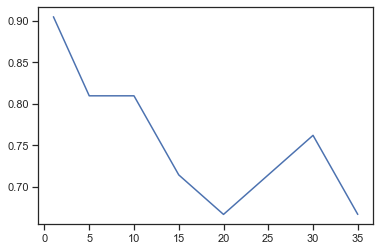

In [28]:
# finding best parameter for the classifier
k_range = [1,5,10,15,20,25,30,35]
Scores = {}
Scores_list = []
best_k = 0
accuracy_max = 0
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_val)
    Scores[k] = metrics.accuracy_score(y_val, y_pred)
    Scores_list.append(metrics.accuracy_score(y_val, y_pred))

# plotting the graph showing relationship between the accuracy and parameters
plt.plot(k_range, Scores_list)

# finding best k value
accuracy = max(Scores_list)
key_list = list(Scores.keys())
val_list = list(Scores.values())
position = val_list.index(accuracy)
best_k = key_list[position]
  
print('The best value of k is', best_k)
print('The accuracy of the basic KNN model on the validation set is', accuracy * 100, '%')

We find that the model has the highest accuracy score for k=1. When k=1, probability estimation is based on a single sample i.e the nearest neighbor. This is very sensitive to distortions like noise, outliers etc. By using a higher value for k, the model becomes more robust against such distortions. Hence, selecting the k value with next best accuracy i.e k=5 & 10.

# [CM7]

In [29]:
# fitting the model on training set
knn =  KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train.values.ravel())

# predicting the target on test set
y_pred = knn.predict(X_test)

#calculating accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the basic KNN model with best k on the test set is', accuracy * 100, '%')

# calculating AUC
pred_prob = knn.predict_proba(X_test)
auc = roc_auc_score(y_test, pred_prob, average = 'macro', multi_class = 'ovr')
print('AUC:', auc)

# calculating f-score
f_score = f1_score(y_test, y_pred, average = 'weighted')
print('f-score:', f_score)

The accuracy of the basic KNN model with best k on the test set is 90.47619047619048 %
AUC: 0.9912393162393163
f-score: 0.9081458224315365


In [30]:
# fitting the model on training set
knn =  KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train.values.ravel())

# predicting the target on test set
y_pred = knn.predict(X_test)

#calculating accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the basic KNN model with best k on the test set is', accuracy * 100, '%')

# calculating AUC
pred_prob = knn.predict_proba(X_test)
auc = roc_auc_score(y_test, pred_prob, average = 'macro', multi_class = 'ovr')
print('AUC:', auc)

# calculating f-score
f_score = f1_score(y_test, y_pred, average = 'weighted')
print('f-score:', f_score)

The accuracy of the basic KNN model with best k on the test set is 85.71428571428571 %
AUC: 0.9928418803418803
f-score: 0.8627943485086342


Upon testing the model with k values of 5 & 10, we observe that k=5 has a higher accuracy and f-score compared to k=10.

### Improved Model

In [31]:
# Improved Model

# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Standard Scalar Normalization

# sc = StandardScaler()
# # Compute the mean and standard deviation based on the training data
# sc.fit(X_train)
# # Scale the training data to be of mean 0 and of unit variance
# X_train_normalized = sc.transform(X_train)
# # Scale the test data to be of mean 0 and of unit variance
# X_test_normalized = sc.transform(X_test)
# # Scale the validation data to be of mean 0 and of unit variance
# X_val_normalized = sc.transform(X_val)

# MinMax Scaler Normalization

scaler_min_max = MinMaxScaler()
# Fit object to data
scaler_min_max.fit(X_train)
# Get transformed train data
X_train_normalized = scaler_min_max.transform(X_train)
# Get transformed test data
X_test_normalized = scaler_min_max.transform(X_test)
# Get transformed val data
X_val_normalized = scaler_min_max.transform(X_val)

# train the model with the classifier's default parameters
#using different weighting schemes (default, manhatten, eculidean)

knn = KNeighborsClassifier(metric='manhattan', weights='distance')
#knn = KNeighborsClassifier(metric='manhattan', weights='distance')
#knn = KNeighborsClassifier()
knn.fit(X_train_normalized, y_train.values.ravel()) 
y_pred = knn.predict(X_test_normalized)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the improved KNN model with default parameters on the test set is', accuracy * 100, '%')

The accuracy of the improved KNN model with default parameters on the test set is 100.0 %


Upon trying different Normalization methods (Standard Scalar , MinMax Scalar), we observed better accuracy with MinMaxScalar.
With Standard scalar normalization, we got an accuracy score of 95% on the test set, whereas we could achieve 100% accuracy score with MinMax scalar normalization. Here, the data is scaled to a fixed range of 0 to 1.  This bounded range makes standard deviations smaller, which can suppress the effect of outliers.

Upon using different weighting schemes (default, manhattan, euclidean), we observed all produced same accuracy of 100%.

The best value of k is 1
The accuracy of the improved KNN model on the validation set is 95.23809523809523 %


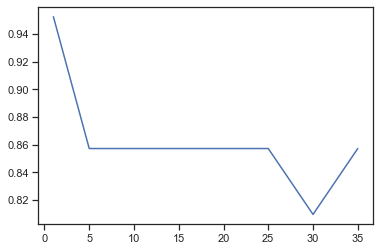

In [32]:
# finding best parameter for the classifier
k_range = [1,5,10,15,20,25,30,35]
Scores = {}
Scores_list = []
best_k = 0
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k, metric='manhattan', weights='distance')
    knn.fit(X_train_normalized, y_train.values.ravel())
    y_pred = knn.predict(X_val_normalized)
    Scores[k] = metrics.accuracy_score(y_val, y_pred)
    Scores_list.append(metrics.accuracy_score(y_val, y_pred))

plt.plot(k_range, Scores_list)

# finding the best k value
accuracy = max(Scores_list)
key_list = list(Scores.keys())
val_list = list(Scores.values()) 
position = val_list.index(accuracy)
best_k = key_list[position]

print('The best value of k is', best_k)
print('The accuracy of the improved KNN model on the validation set is', accuracy * 100, '%')

We find that the model has the highest accuracy score for k=1. When k=1, probability estimation is based on a single sample i.e the nearest neighbor. This is very sensitive to distortions like noise, outliers etc. By using a higher value for k, the model becomes more robust against such distortions. Hence, selecting the k value with next best accuracy, we notice that all values 5,10,15,20,25 & 35 show the same accuracy score. Hence selecting k=5,as the number of neareest neighbours required to calculate the weighted value of the target parameters is less compares to the rest

In [33]:
# using best k value, fitting the model on training set predicting the target on test set
knn =  KNeighborsClassifier(n_neighbors = 5, metric='manhattan', weights='distance')
knn.fit(X_train_normalized, y_train.values.ravel())

# calculating accuracy
y_pred = knn.predict(X_test_normalized)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the improved KNN model with best k on the test set is', accuracy * 100, '%')

# calculating AUC
pred_prob = knn.predict_proba(X_test_normalized)
auc = roc_auc_score(y_test, pred_prob, average = 'macro', multi_class = 'ovr')
print('AUC:', auc)

# calculating f-score
f_score = f1_score(y_test, y_pred, average = 'weighted')
print('f-score:', f_score)

The accuracy of the improved KNN model with best k on the test set is 100.0 %
AUC: 1.0
f-score: 1.0


To verify our selection, we can try and plot the accuracy against k value for the model on the test set. We observe maximum accuracy at k=5 .

The best value of k is 5
The accuracy of the improved KNN model on the test set is 100.0 %


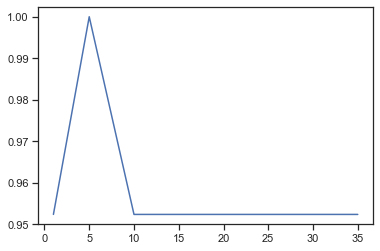

In [34]:
# finding best parameter for the classifier
k_range = [1,5,10,15,20,25,30,35]
Scores = {}
Scores_list = []
best_k = 0
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k, metric='manhattan', weights='distance')
    knn.fit(X_train_normalized, y_train.values.ravel())
    y_pred = knn.predict(X_test_normalized)
    Scores[k] = metrics.accuracy_score(y_test, y_pred)
    Scores_list.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, Scores_list)

# finding the best k value
accuracy = max(Scores_list)
key_list = list(Scores.keys())
val_list = list(Scores.values()) 
position = val_list.index(accuracy)
best_k = key_list[position]

print('The best value of k is', best_k)
print('The accuracy of the improved KNN model on the test set is', accuracy * 100, '%')

# Question 3: Analysis

# [CM8] 

#### 1. Explain why you had to split the dataset into train, validation and test sets?

Answer:

In typical supervised machine learning, using the entire available dataset for training the model will lead to overfitting, i.e. the model simply repeats the labels of the sample data while predicting with perfect accuracy, whereas the model would fail in predicting the unseen/unknown data. This can be avoided by splitting the dataset into train, validation and test sets. The validation and test setsare used to provide an unbiased evaluation of the model fit on the training dataset.

#### 2. Explain why you didn't evaluate directly on the test set and had to use a validation test when finding the best parameters for KNN?

Answer:

Validation set is used to provide an unbiased evaluation of a model fit on the training dataset to fine-tune the model hyperparameters. In the classifier,we used the training dataset to train the model, the validation dataset to compare their performances and find the best accuracy of the model. The test dataset was later trained on the final model to find other performance characteristics.
The test set is generally used to evaluate competing models. If we use test dataset for fine-tuning the model, it will lead to overfitting, as we are testing the model as well as tuning parameters on the same dataset.


#### 3. What was the effect of changing k for KNN. Was the accuracy always affected the same way with an increase of k? Why do you think this happened?

Answer:

For Iris:
    
In Iris dataset, With changing k for KNN, no constant increase or decrease in the value of accuracy was observed. Initially a decrease in the value of accuracy is observed as we change the value of k from 1 to 5.Then the accuracy score remains constant for the values of k =10,15,20 and 25. As we change k from 25 to 30,there is a further decrease and then an increase from 30 to 35. This behavior can be attributed to the concept of underfitting and overfitting. 

At k=5,10,15,20,25 we can say that the model is fitted enough to achieve good efficiency. At k=30, its accuracy falls down and overfitting phase begins. So the best value of K, is at K=5. At k=5, the number of neareest neighbours required to calculate the weighted value of the target parameters is less compares to the rest (k=10,20,25)

For heart disease:

In heart disease dataset, with changing k for KNN, we observe an initial decrease, and then a steep increase in the value of accuracy. Initially a decrease in the value of accuracy is observed as we change the value of k from 1 to 5 and then to 10.Then the value of accuracy increases as we move from k=10 until 25 achieving maximum at k=25. As we change k further from 25 to 30,there is a decrease and then it becomes flat from 30 to 35. This behavior can be attributed to the concept of underfitting and overfitting. 

At k=1,5,10,15,20 we can say that the model isn't fitted enough to achieve maximum efficiency. At 25, we observe maximum efficiency as model is fitted perfectly. At k=30 &35, its accuracy falls down and overfitting occurs. So the best value of k,is k=25.

## References

https://medium.com/towards-artificial-intelligence/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

https://stats.stackexchange.com/questions/363889/which-type-of-data-normalizing-should-be-used-with-knn

https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765

https://medium.com/swlh/overfitting-vs-underfitting-d742b4ffac57

https://github.com/krishnaik06/Predicting-Heart-Disease/blob/master/Heart%20Disease%20Predictions.ipynb

https://scikit-learn.org/stable/index.html

https://seaborn.pydata.org/

https://pandas.pydata.org/

https://numpy.org/

https://matplotlib.org/

https://www.scipy.org/

https://towardsdatascience.com/heart-disease-prediction-73468d630cfc

http://www.philipkalinda.com/ds3.html

https://www.kaggle.com/asimislam/heart-disease-uci-eda-and-ml-w-lr
